In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,validation_curve
from sklearn.svm import SVC

arnings.filterwarnings("ignore")

# Load data
csv_features = "./acsincome_ca_features.csv"
csv_labels = "./acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
num_samples = int(len(X_all)*0.1)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)
X_train = scaler.fit_transform(X_train) 

On ne standardize que le set d'entraînement des features (X_train) car on ne touche pas au set de test et les labels (Y) correspondant à des booléens n'ont pas besoin d'être standardisés.

In [6]:
# Creation d'une instance de SVM
SVM_model = SVC()

# Test avec default parameters
SVM_model.fit(X_train, Y_train)
print("Default model score:", SVM_model.score(X_test,Y_test))
# print("Default model score:", SVM_model.score(X_train,Y_train))

Default model score: 0.5848237097598364


Default model score with 10% : 0.5848

with 20% : 0.59

with 50% : 0.5874

Default parameters :
- C = 1
- kernel = rbf
- gamma = scale

/home/mecaliff/.conda/envs/appsupervise-tp/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mecaliff/.conda/envs/appsupervise-tp/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mecaliff/.conda/envs/appsupervise-tp/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mecaliff/.conda/envs/appsupervise-tp/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConve

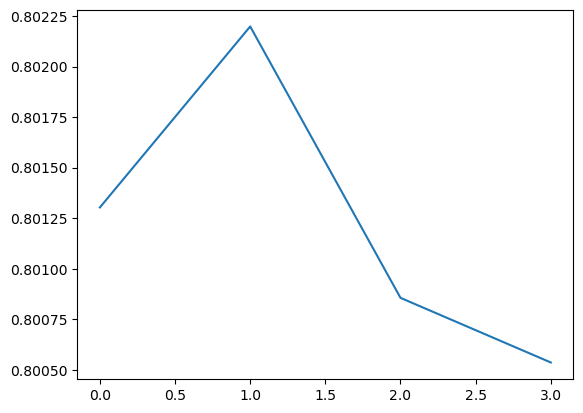

In [3]:
# Cross validation avec variation de C
# train_score,val_score = validation_curve(SVM_model, X_train, Y_train,'C', k, cv=5)

val_score = []
for k in range(1,5):
    score = cross_val_score(SVC(C=k), X_train, Y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# print(val_score.mean())

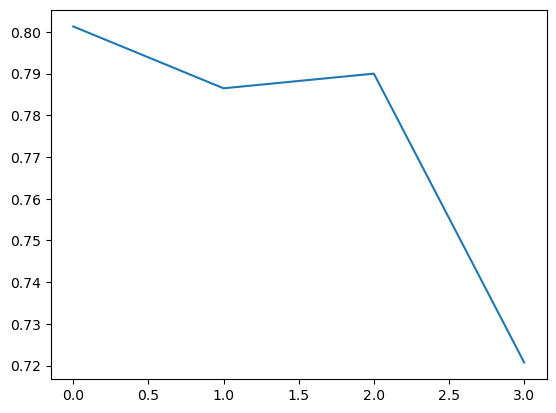

In [9]:
# Cross validation avec variation de C
# train_score,val_score = validation_curve(SVM_model, X_train, Y_train,'C', k, cv=5)

val_score = []
for k in ['rbf', 'linear', 'poly', 'sigmoid']:
    score = cross_val_score(SVC(kernel=k), X_train, Y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# print(val_score.mean())